In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data base with coordinates and isproton, isneutron data

In [2]:
df11 = pd.read_csv('rho01Sam1_db.csv')
df12 = pd.read_csv('rho02Sam1_db.csv')
df13 = pd.read_csv('rho03Sam1_db.csv')
df14 = pd.read_csv('rho04Sam1_db.csv')
df15 = pd.read_csv('rho05Sam1_db.csv')
df16 = pd.read_csv('rho06Sam1_db.csv')
df21 = pd.read_csv('rho01Sam2_db.csv')
df22 = pd.read_csv('rho02Sam2_db.csv')
df23 = pd.read_csv('rho03Sam2_db.csv')
df24 = pd.read_csv('rho04Sam2_db.csv')
df25 = pd.read_csv('rho05Sam2_db.csv')
df26 = pd.read_csv('rho06Sam2_db.csv')
df = pd.concat([df11,df12,df13,df14,df15,df16,df21,df22,df23,df24,df25,df26])
df.head()

,x0,y0,z0,ip0,in0,x1,y1,z1,ip1,in1,...,x4911,y4911,z4911,ip4911,in4911,x4912,y4912,z4912,ip4912,in4912
0,0.177253,0.020937,0.005375,1,0,0.215480,0.022285,0.007565,1,0,...,0.951113,0.877968,0.960496,0,1,0.971923,0.858115,0.968270,0,1
1,0.415156,0.056575,0.060082,1,0,0.399265,0.017177,0.078137,1,0,...,0.965008,0.866791,0.934393,0,1,0.984711,0.883360,0.837078,0,1
2,0.003533,0.000746,0.093678,1,0,0.021808,0.023451,0.142425,1,0,...,0.972306,0.875576,0.908103,0,1,0.951699,0.863874,0.972608,0,1
3,0.004735,0.019365,0.114002,1,0,0.030720,0.004933,0.087439,1,0,...,0.981348,0.866140,0.870222,0,1,0.995426,0.857306,0.921043,0,1
4,0.084641,0.055302,0.040997,1,0,0.024898,0.001129,0.057707,1,0,...,0.983670,0.860170,0.888134,0,1,0.954532,0.867424,0.898136,0,1


In [3]:
df.columns

Index(['x0', 'y0', 'z0', 'ip0', 'in0', 'x1', 'y1', 'z1', 'ip1', 'in1',
       ...
       'x4911', 'y4911', 'z4911', 'ip4911', 'in4911', 'x4912', 'y4912',
       'z4912', 'ip4912', 'in4912'],
      dtype='object', length=24565)

# Load Minkowski functional data

In [4]:
mf1 = pd.read_csv('minkowskiDataSam1.csv')
mf2 = pd.read_csv('minkowskiDataSam2.csv')
# concatenate dataframe
mf = pd.concat([mf1,mf2])
mf.head()

,Density,Sample,VolumeDensity,SurfaceAreaDensity,MeanBreadthDensity,EulerNumberDensity
0,0.01,91,0.186,0.116,0.004,0.000386
1,0.01,92,0.185,0.116,0.004,0.000373
2,0.01,93,0.185,0.116,0.004,0.000386
3,0.01,94,0.185,0.116,0.004,0.000392
4,0.01,95,0.185,0.116,0.004,0.000377


## Calculate the normalize breadth density and normalize Euler number using fm as lenght unit

In [5]:
# normalize mean breadth density and euler number (by dividing over surface area density)
# MBD-norm: mean breadth density normalized
# resolution = 1.5 fm/pixel
mf['MBD-norm'] = 1.5 * mf['MeanBreadthDensity']/mf['SurfaceAreaDensity']
# END-norm: euler number density normalized
mf['END-norm'] = mf['EulerNumberDensity']/(1.5*1.5*mf['SurfaceAreaDensity'])
mf.head()

,Density,Sample,VolumeDensity,SurfaceAreaDensity,MeanBreadthDensity,EulerNumberDensity,MBD-norm,END-norm
0,0.01,91,0.186,0.116,0.004,0.000386,0.051724,0.001480
1,0.01,92,0.185,0.116,0.004,0.000373,0.051724,0.001430
2,0.01,93,0.185,0.116,0.004,0.000386,0.051724,0.001480
3,0.01,94,0.185,0.116,0.004,0.000392,0.051724,0.001502
4,0.01,95,0.185,0.116,0.004,0.000377,0.051724,0.001444


In [7]:
mf.columns

Index(['Density', 'Sample', 'VolumeDensity', 'SurfaceAreaDensity',
       'MeanBreadthDensity', 'EulerNumberDensity', 'MBD-norm', 'END-norm'],
      dtype='object')

## Convert 'MBD-norm' and 'END-norm' columns to numpy-arrays

In [8]:
mbd = mf['MBD-norm'].squeeze()
mbd = mbd.to_numpy()
end = mf['END-norm']
end = end.to_numpy()

## Function to determine type of pasta as a function of 'MBD-norm' (mean breadth density normalized) $B$ and 'END-norm' (Euler number density normalized) $\chi$

In [9]:
# Type of pasta function
def pasta_type(B, chi):
    if np.greater(chi,0.001):
        if np.less(B,0):
            #print('Anti-gnocchi')
            pasta_type = 0
        else:
            #print('Gnocchi')
            pasta_type = 6
    elif np.less_equal(abs(chi),0.001):
        if np.less_equal(B,0.005):
            #print('Lasagna')
            pasta_type = 2
        else:
            #print('spaguetti')
            pasta_type = 5
    else:
        if np.less(B,-0.005):
            #print('Anti-spaguetti')
            pasta_type = 1
        elif np.less_equal(abs(B),0.005):
            #print('Defects')
            pasta_type = 3
        else:
            #print('waffle')
            pasta_type = 4
    return pasta_type

## Coding for pasta
* 'Anti-gnocchi', pasta_type = 0
* 'Anti-spaguetti', pasta_type = 1
* 'Lasagna', pasta_type = 2
* 'Defects', pasta_type = 3
* 'Waffle', pasta_type = 4
* 'Spaguetti', pasta_type = 5
* 'Gnocchi', pasta_type = 6

## Vectorized pasta function

In [10]:
vec_pasta = np.vectorize(pasta_type)

## Apply vectorized pasta function to $B$ and $\chi$ numpy-arrays

In [11]:
pasta = vec_pasta(mbd, end)

## Machine Learning -- KNN model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Data and labels

In [15]:
X = df
y = pasta

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)

## Check classification accuracy of KNN with k=5

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8333333333333334


## Cross validation

In [18]:
from sklearn.model_selection import cross_val_score

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=6, scoring='accuracy')
print(scores)

[0.65 1.   0.65 0.95 1.   0.85]


In [22]:
print(scores.mean())

0.85


## Search for optimal k

In [27]:
k_range = range(1, 30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=6, scoring='accuracy')
    #print(scores.mean())
    k_scores.append(scores.mean())
    #print(k_scores)
print(k_scores)

[0.8833333333333333, 0.8666666666666666, 0.8916666666666666, 0.8333333333333334, 0.85, 0.8249999999999998, 0.8083333333333332, 0.7666666666666666, 0.7749999999999999, 0.7583333333333333, 0.725, 0.7166666666666667, 0.7000000000000001, 0.65, 0.5750000000000001, 0.5333333333333333, 0.5083333333333334, 0.5333333333333333, 0.5, 0.5333333333333333, 0.49166666666666664, 0.525, 0.4749999999999999, 0.5166666666666667, 0.5083333333333333, 0.5333333333333333, 0.5, 0.5000000000000001, 0.4833333333333334]


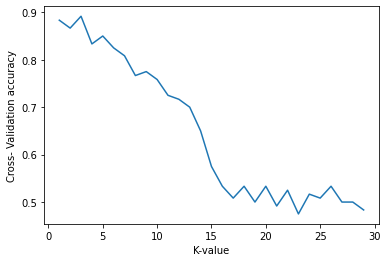

In [28]:
plt.plot(k_range, k_scores)
plt.xlabel('K-value')
plt.ylabel('Cross- Validation accuracy')
plt.show()

## Machine Learning -- SVM model

In [30]:
from sklearn import svm

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)
# create a svm classifier
clf = svm.SVC(kernel='linear')
# train model
clf.fit(X_train, y_train)
# prediction
y_pred = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred, average='weighted'))
print('Recall:',metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9
Precision: 0.9333333333333333
Recall: 0.9
